In [1]:
import openai
import pandas as pd
openai.api_key = "your_openai_api_key"

In [9]:
# apply completion using your LLMs
import openai
import pandas as pd
openai.api_key = "your_openai_api_key"

# Load your test dataset
test_data = pd.read_excel("the_dataset_you_prefer_to_use.xlsx", engine="openpyxl")

# Function to generate completion with your fine-tuned model
def generate_completion(prompt):
    response = openai.Completion.create(
        engine="curie:ft-personal-2023-04-04-11-58-59",  # Replace this with your fine-tuned model ID
        prompt=prompt,
        max_tokens=40,  # Adjust this value based on your desired completion length
        n=1,
        stop=["."],
        temperature=0.1,
    )
    return response.choices[0].text.strip()

# Generate completions for each prompt in the test dataset
test_data["GPT3_curie_fine_tuned_completion"] = test_data["prompt"].apply(generate_completion)

# Save the test dataset with generated completions to a new Excel file
test_data.to_excel("fine_tuned_completions.xlsx", index=False, engine="openpyxl")

print("Generated completions saved in the 'GPT3_curie_fine_tuned_completion' column of fine_tuned_completions.xlsx")

Generated completions saved in the 'GPT3_curie_fine_tuned_completion' column of fine_tuned_completions.xlsx


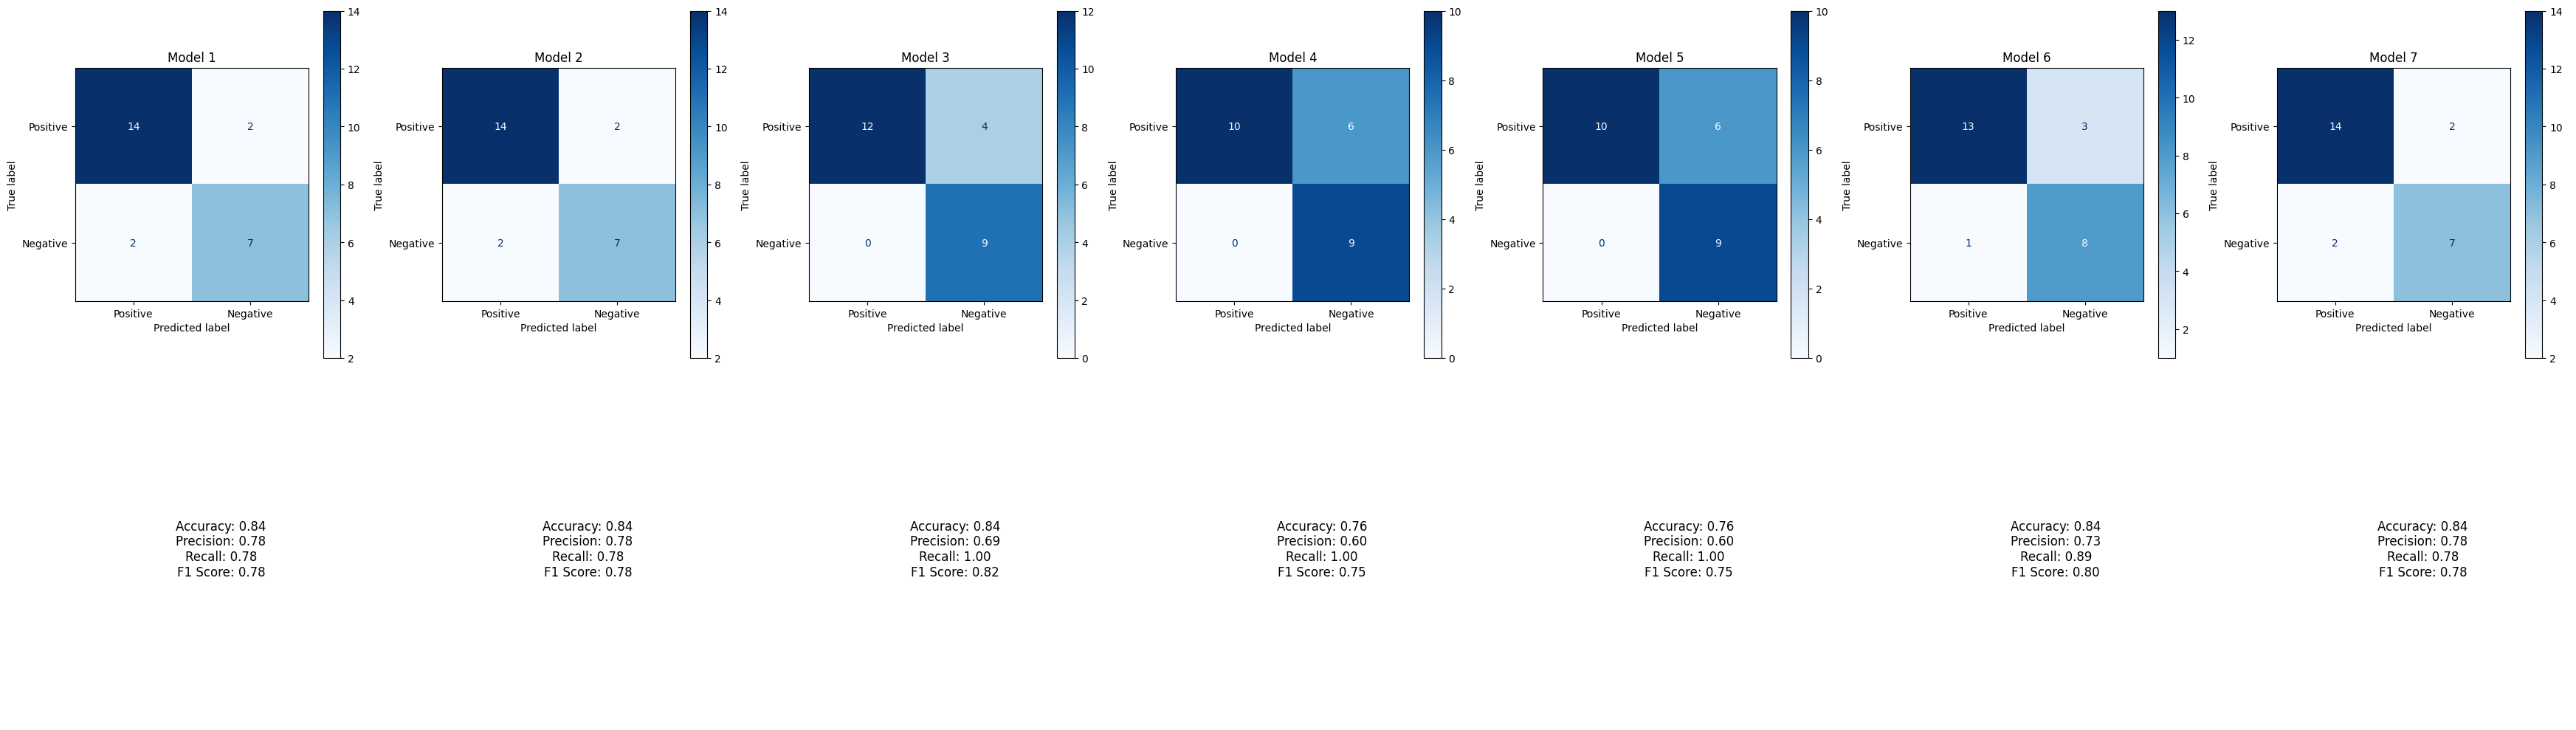

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming confusion_matrices is the same list from the previous example
confusion_matrices = [
    np.array([[14, 2], [2, 7]]),
    np.array([[14, 2], [2, 7]]),
    np.array([[12, 4], [0, 9]]),
    np.array([[10, 6], [0, 9]]),
    np.array([[10, 6], [0, 9]]),
    np.array([[13, 3], [1, 8]]),
    np.array([[14, 2], [2, 7]]),
]

def scores_from_cm(cm):
    true_negatives, false_positives, false_negatives, true_positives = cm.ravel()
    
    accuracy = (true_positives + true_negatives) / cm.sum()
    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    f1 = 2 * (precision * recall) / (precision + recall)
    
    return accuracy, precision, recall, f1

# Define the number of rows and columns for subplots
n_rows = 2
n_cols = len(confusion_matrices)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))

for i, cm in enumerate(confusion_matrices):
    # Plot the confusion matrix
    ConfusionMatrixDisplay(cm, display_labels=["Positive", "Negative"]).plot(ax=axes[0, i], cmap="Blues")
    axes[0, i].set_title(f"Model {i + 1}")

    # Calculate and display the scores
    accuracy, precision, recall, f1 = scores_from_cm(cm)
    score_text = f"Accuracy: {accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1 Score: {f1:.2f}"
    axes[1, i].text(0.5, 0.5, score_text, fontsize=12, ha="center", va="center")
    axes[1, i].axis("off")

plt.tight_layout()
plt.show()


In [2]:
# The code of test_2
import openai
import pandas as pd
from openai.api_resources import engine
openai.api_key = "your_openai_api_key"



# Read the data from the Excel file
data = pd.read_excel("unifying_test_data_results_test_2.xlsx")

# Set the model names
models = [
    "text-davinci-003",
    "text-curie-001",
    "text-babbage-001",
    "text-ada-001",
    "davinci:ft-personal-2023-04-04-13-27-35",
    "curie:ft-personal-2023-04-04-11-58-59"
]

# Define a function to generate completions
def generate_completion(prompt, model):
    response = openai.Completion.create(
        engine=model,
        prompt=prompt,
        max_tokens=50,
        n=1,
        stop=None,
        temperature=0.5,
    )
    return response.choices[0].text.strip()

# Iterate through the rows and generate completions for each model
for index, row in data.iterrows():
    if index < 1 or index > 22:
        continue

    prompt = row["Prompt"]

    for model in models:
        completion = generate_completion(prompt, model)
        data.at[index, model + "_completion"] = completion

# Save the results to a new Excel file
data.to_excel("unifying_test_data_test_2_with_completions.xlsx", index=False)
